In [2]:
import os
os.chdir("..")


In [3]:
%load_ext autoreload
%autoreload 2

from numerics.utilities.misc import *
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle


In [4]:
path_dir = get_def_path()+"sweep_gamma/"
with open(path_dir+"dict_errors_gamma_bonudsB.pickle","rb") as g:
    gdit = pickle.load(g)#, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
timbins1 = gdit["timbins1"]
timbins0 = gdit["timbins0"]
counts0= gdit["counts0"]
counts1 = gdit["counts1"]
goods1 = gdit["goods1"]  
goods0 =  gdit["goods0"]
poors1 = gdit["poors1"]
poors0 = gdit["poors0"]

In [6]:
B = 8.
dB = .2
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]


In [7]:
gammas = np.linspace(110, 10000., 32)


In [8]:
diffs = {}
for g in gammas[1:]:
    diffs[g] = [np.mean(np.square(np.array(counts0[g][indb]) - np.array(goods0[g][indb]))) for indb in range(len(bpos))]

In [27]:
cmap = plt.get_cmap('RdYlBu')
cc = cmap(np.linspace(0,1,len(gammas[1:])))


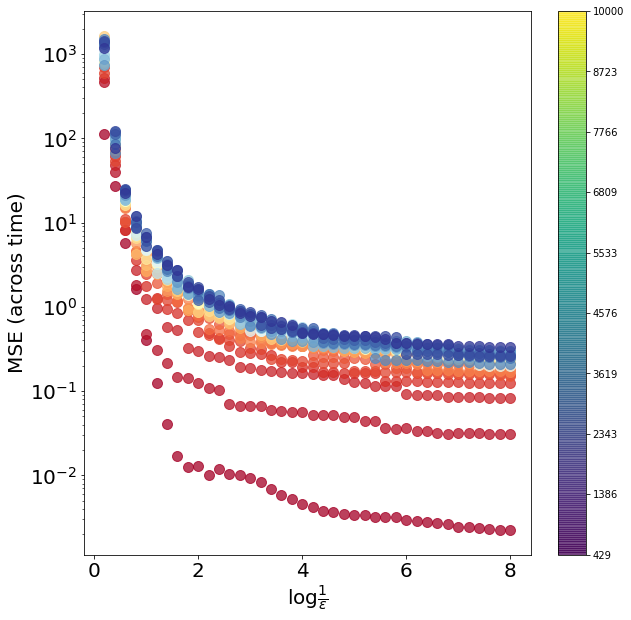

In [40]:
ALPHA = 0.75
fig = plt.figure(figsize=(10,10))
ax=plt.subplot(111)
for k, g in enumerate(gammas[1:]):
    im =ax.scatter(bpos, diffs[g],  vmin=gammas[1], vmax=gammas[-1],color=cc[k], alpha=ALPHA, s=100, cmap=cmap)
ax.set_yscale("log")
cbar = fig.colorbar(im,ticks=list(np.linspace(0,1,10)))
gammas_t = [gammas[k] for k in np.linspace(1,len(gammas)-1,10).astype(int)]
cbar.set_alpha(ALPHA)
cbar.ax.set_yticklabels([str(int(gamma)) for gamma in gammas_t])  # vertically oriented colorbar
ax.set_xlabel(r'$\log \frac{1}{\epsilon}$',size=20)
ax.set_ylabel("MSE (across time)",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig("errors_boundsB.pdf")

In [42]:
[np.array(counts0[g][indb]) fo

array([2.10679307e-01, 6.60222445e-01, 1.04846425e+00, 1.39865694e+00,
       1.47475515e+00, 1.46982286e+00, 1.40711230e+00, 1.30564801e+00,
       1.13724549e+00, 9.94913652e-01, 8.88517079e-01, 7.25046847e-01,
       6.29924083e-01, 5.19299831e-01, 4.39678554e-01, 3.67103408e-01,
       3.16371268e-01, 2.61411448e-01, 2.00814724e-01, 1.62765619e-01,
       1.45150292e-01, 1.05691960e-01, 8.31443420e-02, 7.53935983e-02,
       5.42552062e-02, 4.36860102e-02, 3.80491057e-02, 3.59352665e-02,
       3.17075881e-02, 2.18430051e-02, 2.25476182e-02, 1.26830352e-02,
       1.19784222e-02, 1.12738091e-02, 1.47968744e-02, 7.75074375e-03,
       4.93229148e-03, 4.22767841e-03, 3.52306534e-03, 4.22767841e-03,
       2.81845227e-03, 3.52306534e-03, 1.40922614e-03, 7.04613068e-04,
       0.00000000e+00, 0.00000000e+00, 7.04613068e-04, 0.00000000e+00,
       7.04613068e-04, 2.81845227e-03])

In [46]:
countss0 =np.stack([np.stack(counts0[g]) for g in gammas[1:]])
goodss0 =np.stack([np.stack(goods0[g]) for g in gammas[1:]])

In [49]:
errrs_gammas_t = np.mean(np.square(countss0 - goodss0), axis=1)

In [52]:
errrs_gammas_t.shape

(31, 50)

In [58]:
weird_time = np.linspace(0,8.,50)

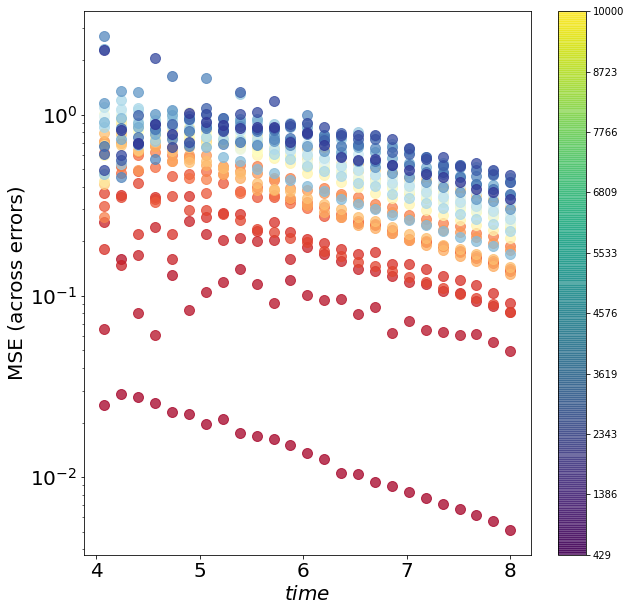

In [60]:
ALPHA = 0.75
fig = plt.figure(figsize=(10,10))
ax=plt.subplot(111)
for k, g in enumerate(gammas[1:]):
    im =ax.scatter(weird_time, errrs_gammas_t[k],  vmin=gammas[1], vmax=gammas[-1],color=cc[k], alpha=ALPHA, s=100, cmap=cmap)
ax.set_yscale("log")
cbar = fig.colorbar(im,ticks=list(np.linspace(0,1,10)))
gammas_t = [gammas[k] for k in np.linspace(1,len(gammas)-1,10).astype(int)]
cbar.set_alpha(ALPHA)
cbar.ax.set_yticklabels([str(int(gamma)) for gamma in gammas_t])  # vertically oriented colorbar
ax.set_xlabel(r'$time$',size=20)
ax.set_ylabel("MSE (across errors)",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#plt.savefig("errors_boundsB.pdf")